In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [3]:
def mov(xp_xs,t,a_b = [0,0]):
    rp = sqrt(xp_xs[0]**2+xp_xs[1]**2)
    rs =  sqrt(xp_xs[4]**2+xp_xs[5]**2)
    dif_xp_xs = xp_xs[0:2]-xp_xs[4:6]
    dist_xp_xs = sqrt(dif_xp_xs[0]**2 + dif_xp_xs[1]**2)
    dxp,dyp =xp_xs[2],xp_xs[3]
    dvxp = -(xp_xs[0]/rp**3)-a_b[0]*(dif_xp_xs[0]/dist_xp_xs**3)
    dvyp = -(xp_xs[1]/rp**3)-a_b[0]*(dif_xp_xs[1]/dist_xp_xs**3)
    dxs,dys =xp_xs[6],xp_xs[7]
    dvxs = -(xp_xs[4]/rs**3)+a_b[1]*(dif_xp_xs[0]/dist_xp_xs**3)
    dvys = -(xp_xs[5]/rs**3)+a_b[1]*(dif_xp_xs[1]/dist_xp_xs**3)
    return array([dxp,dyp,dvxp,dvyp,dxs,dys,dvxs,dvys])
    
    

In [4]:
p_ini = [1,0,0,0.5,1.5,0,0,0.5]
t,r = rk4(mov,p_ini,[0,10])

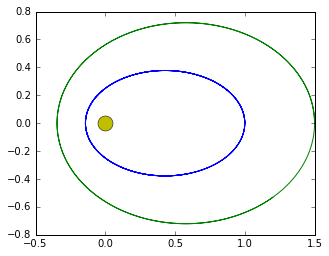

In [5]:
plot(r[:,0],r[:,1],r[:,4],r[:,5])
plot(0,0,"o",color = "y",markersize=15)
axes().set_aspect("equal")
show()


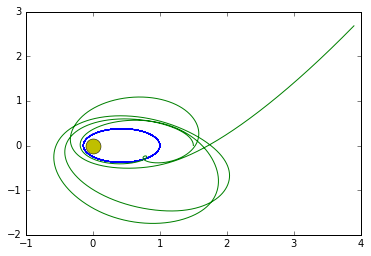

In [6]:
p_ini = [1,0,0,0.5,1.5,0,0,0.5]
t1,r1 = rk4(mov,p_ini,[0,10*pi],[0,.1], h=1e-3)
plot(r1[:,0],r1[:,1],r1[:,4],r1[:,5])
plot(0,0,"o",color = "y",markersize=15)
#axes().set_aspect("equal")
show()